<a href="https://colab.research.google.com/github/KARINAgoncalvesSOARES/Machine_Learning/blob/main/machine_learning_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<h2 align="center">Aprendendo sobre a biblioteca: scikit-learn

Data Scientist.: Karina Gonçalves Soares

Links de estudo:
* [Bibioteca requests](https://www.digitalocean.com/community/tutorials/how-to-get-started-with-the-requests-library-in-python-pt)

* [Repositório](https://github.com/EddyGiusepe/Machine_Learning/blob/main/2_ML_Scikit_Learn.ipynb)

* [to_csv()](https://www.aprendadatascience.com/blog/fun%C3%A7%C3%A3o-to_csv)

#Bibliotecas de Python para Machine Learning

Neste estudo sobre Machine Learning veremos múltiplos algoritmos desenvolvidos durante as últimas décadas e que podemos usar como alternativa às Redes Neurais (Depp Learning), em alguns casos obtendo melhores resultados (sobretudo em casos onde não temos um Dataset grande). Antes de começar nosso estudo sobre os algoritmos e aplicações, vamos falar sobre o ecosistema de Bibliotecas existentes em Python para Machine Learning (para a área de Ciência de Dados). As mais usadas pela comunidade são:

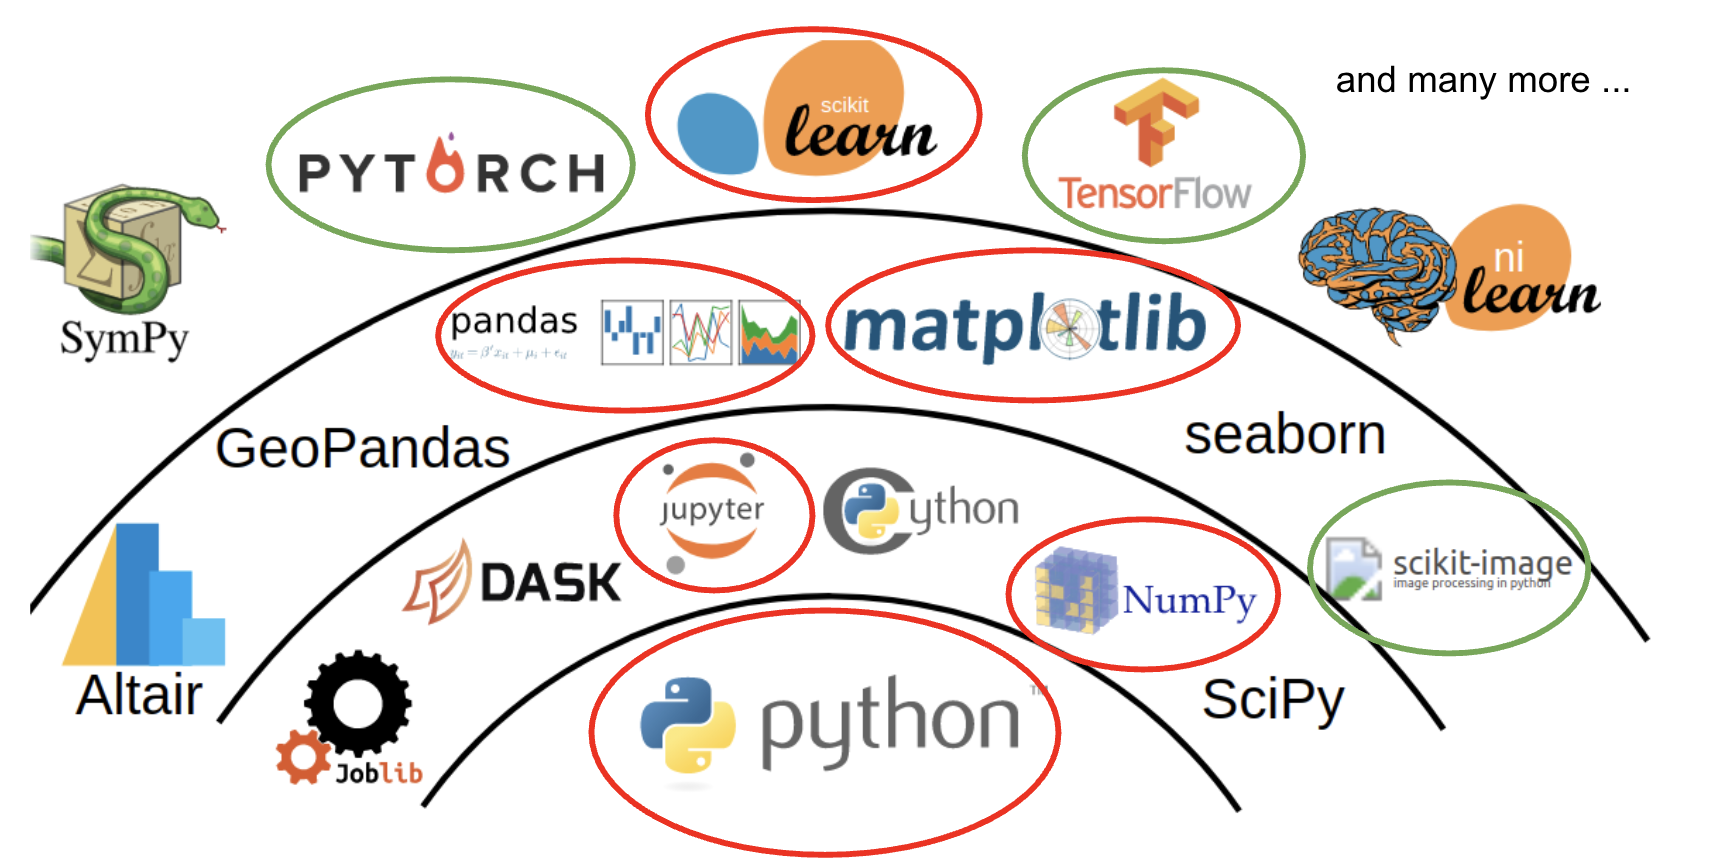

A imagem anterior mostra as ferramentas mais usadas hoje em dia para ML com Python. As ferramentas (bibliotecas) encerradas com uma circunferência vermelha são as que mais usaremos aqui, as encerradas com uma circunferência verde são bibliotecas para Deep Learning (Já usamos em outros scripts) e as que não estão encerradas é para futuros estudos.

Usaremos a linguagem de programação Python, NumPy para cálculo numérico, o Jupyter para executar nossos códigos em Notebooks, pandas (baseado em NumPy) para trabalhar com Dados tabulares, matplotlib para gerar nosso gráficos e finalmente usaremos a biblioteca scikit-learn para treinar modelos de Machine Learning.

#scikit-learn

A seguir vamos introduzir os conceitos mais importantes de [scikit-learn](https://scikit-learn.org/stable/). Começamos instalando esta biblioteca, assim:

!pip install scikit-learn

também podemos acessar a [documentação](https://scikit-learn.org/stable/getting_started.html) e os [exemplos](https://scikit-learn.org/stable/auto_examples/index.html).

De maneira concisa, para o treinamento de modelos, podemos seguir os seguintes passos:

1.Preparar os Dados

2.Treinar os Modelos

3.Otimizar hiperparâmetros

existem alguns passos adicionais que veremos mais para frente.


In [1]:
# !pip install scikit-learn

#Preparando os Dados
Para este exemplo usaremos um Dataset para predição de preços de casas.

In [2]:
import requests 
import tarfile

URL = "https://mymldatasets.s3.eu-de.cloud-object-storage.appdomain.cloud/housing.tgz"
PATH = "housing.tgz"

def getData(url = URL, path=PATH):
  r = requests.get(url)
  with open(path,'wb') as f:
    f.write(r.content)
  housing_tgz = tarfile.open(path)
  housing_tgz.extractall()
  housing_tgz.close()


In [3]:
# Chamamos à função

getData()

In [4]:
import pandas as pd

data = pd.read_csv('housing.csv')
data.head()

# Observa que nossa target é: "median_house_value"

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
# shape

data.shape

(20640, 10)

Nosso objetivo será predezir a variável `median_house_value` a partir dos outros Dados.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
# Informações sobre a coluna especificada

data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Podemos observar que temos variáveis continuas, variáveis categóricas e alguns valores missing (missing values). Veremos como tratar estes aspectos com scikit-learn. Primeiro separaremos uma quantidade de amostras para TREINAMENTO e o restante para AVALIAR nossos modelos. Para isso utilizamos a seguinte biblioteca:

In [8]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size = 0.2) #  20% dos dados para teste, 80% para treinamento

# Verificamos a quantidade desses Dados:
len(data), len(train), len(test)

(20640, 16512, 4128)

In [9]:
import matplotlib.pyplot as plt


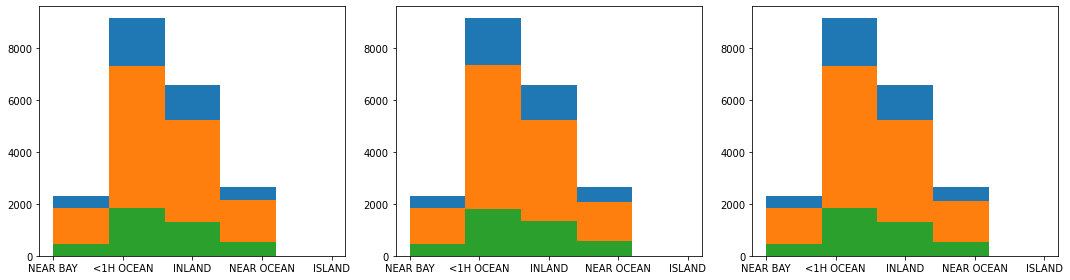

In [10]:
fig = plt.figure(figsize=(15,4))
ax = plt.subplot(1, 3, 1)
train, test = train_test_split(data, test_size=0.2)
ax.hist(data['ocean_proximity'], bins=len(data['ocean_proximity'].value_counts()))
ax.hist(train['ocean_proximity'], bins=len(data['ocean_proximity'].value_counts()))
ax.hist(test['ocean_proximity'], bins=len(data['ocean_proximity'].value_counts()))
ax = plt.subplot(1, 3, 2)
train, test = train_test_split(data, test_size=0.2, random_state=42) # sempre teremos o mesmo resultado
ax.hist(data['ocean_proximity'], bins=len(data['ocean_proximity'].value_counts()))
ax.hist(train['ocean_proximity'], bins=len(data['ocean_proximity'].value_counts()))
ax.hist(test['ocean_proximity'], bins=len(data['ocean_proximity'].value_counts()))
ax = plt.subplot(1, 3, 3)
train, test = train_test_split(data, test_size=0.2, random_state=69, stratify=data['ocean_proximity']) # balancear
ax.hist(data['ocean_proximity'], bins=len(data['ocean_proximity'].value_counts()))
ax.hist(train['ocean_proximity'], bins=len(data['ocean_proximity'].value_counts()))
ax.hist(test['ocean_proximity'], bins=len(data['ocean_proximity'].value_counts()))
plt.tight_layout()
plt.show()

In [11]:
# Convertendo os dados de um dataframe para um arquivo csv (comma-separated-values/Valores Separados Por Virgula).

train.to_csv('train.csv', index=False)
test.to_csv('test.csv', index=False)

Para tratar valores faltantes (missing values) podemos usar um Imputer, que pode ser muito simples, como trocar os valores inexistentes pelo valor promédio (a média) da coluna ou um valor fixo através do uso de algoritmos mais complexos. Neste exemplo, só temos uma coluna com missing values (total_rooms) de tipo numérico, mas se tivéssemos missing values em VARIÁVEIS CATEGÓRICOS deveríam ser tratados com uma estratégia diferente. De fato, é uma boa ideia separar as variáveis numéricas das categóricas, já que elas são tratadas de maneiras diferentes.

In [12]:
# .drop()- remove linhas ou colunas
# .copy()- retorna uma nova lista. Você pode usar o método copy() para replicar uma lista e deixar a lista original inalterada.

train_data, y_train = train.drop(['median_house_value'], axis=1), train['median_house_value'].copy()
test_data, y_test = test.drop(['median_house_value'], axis=1), test['median_house_value'].copy()

train_num = train_data.drop(['ocean_proximity'], axis=1)
train_cat = train_data[['ocean_proximity']]

In [13]:
from sklearn.impute import SimpleImputer

# SimpleImputer: substitui os valores ausentes usando uma estatística descritiva (por exemplo, média, mediana(median), moda, etc.)
imputer = SimpleImputer(strategy="median")# definir imputer

# Com a função .fit() TREINAMOS o modelo
imputer.fit(train_num) # calcular mediana
imputer.statistics_ # valores calculados são as MEDIANAS das colunas

array([-118.5    ,   34.26   ,   29.     , 2127.     ,  434.     ,
       1167.5    ,  409.     ,    3.54025])

Então, a seguir a função .transform() vai preencher os valores faltantes (missing values) com as respectivas MEDIANAS.

In [14]:
x_train_num = imputer.transform(train_num) # alterar valores ausentes para a mediana

x_train_num

array([[-1.1764e+02,  3.4040e+01,  2.1000e+01, ...,  2.5560e+03,
         4.8400e+02,  2.4716e+00],
       [-1.1925e+02,  3.4270e+01,  4.6000e+01, ...,  3.8200e+02,
         1.4300e+02,  3.5000e+00],
       [-1.1833e+02,  3.3930e+01,  3.8000e+01, ...,  4.1200e+02,
         1.1900e+02,  6.0718e+00],
       ...,
       [-1.1897e+02,  3.5380e+01,  4.2000e+01, ...,  1.0380e+03,
         2.9900e+02,  9.9510e-01],
       [-1.1934e+02,  3.4390e+01,  2.7000e+01, ...,  3.1400e+02,
         1.0600e+02,  2.4659e+00],
       [-1.2232e+02,  3.7570e+01,  4.2000e+01, ...,  2.3770e+03,
         5.8800e+02,  3.2891e+00]])

Aqui observamos o primeiro padrão que se repetirá constantemente ao trabalhar com Scikit-Learn, o qual é o uso das funções fit e transform. A primeira usaremos para calcular todo o necessário para usar uma classe (seja um imputer ou um modelo) e, no caso de objetos para processamento de Dados, usaremos o transform para gerar um array NumPy pronto para treinar modelos, levando a cabo todo o processamento necessário. Outro procesamento muito comum, que ajuda a alguns modelos a aprender melhor é o ESCALADO dos Dados.

Importante saber que "StandardScaler" serve para NORMALIZAR NOSSOS DADOS usando a Média e Desvio padrão.

In [15]:
from sklearn.preprocessing import StandardScaler # há também min-max

scaler = StandardScaler() # mean e std (Média e desvio padrão)
scaler.fit(x_train_num)

x_train_num_scaled = scaler.transform(x_train_num)

# Logo obtemos nossos Dados normalizados
x_train_num_scaled